<a href="https://colab.research.google.com/github/Alton01/customer_churn_prediction_ML_model/blob/main/customer_churn_prediction_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [14]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [15]:
df.shape

(7043, 21)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
# drop unneeded columns
df = df.drop(columns=['customerID'])

In [18]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
# printing unique values in gender column
print(df["gender"].unique())

['Female' 'Male']


In [24]:
# printing unique values in all the columns

for col in df.columns:
  print(col, df[col].unique())
  print("."*50)

gender ['Female' 'Male']
..................................................
SeniorCitizen [0 1]
..................................................
Partner ['Yes' 'No']
..................................................
Dependents ['No' 'Yes']
..................................................
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
..................................................
PhoneService ['No' 'Yes']
..................................................
MultipleLines ['No phone service' 'No' 'Yes']
..................................................
InternetService ['DSL' 'Fiber optic' 'No']
..................................................
OnlineSecurity ['No' 'Yes' 'No internet service']
..................................................
OnlineBackup ['Yes' 'No' 'No internet service']
.......

In [25]:
# printing unique values in all the columns while excluding numerical values
numerical_features_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("."*50)

gender ['Female' 'Male']
..................................................
SeniorCitizen [0 1]
..................................................
Partner ['Yes' 'No']
..................................................
Dependents ['No' 'Yes']
..................................................
PhoneService ['No' 'Yes']
..................................................
MultipleLines ['No phone service' 'No' 'Yes']
..................................................
InternetService ['DSL' 'Fiber optic' 'No']
..................................................
OnlineSecurity ['No' 'Yes' 'No internet service']
..................................................
OnlineBackup ['Yes' 'No' 'No internet service']
..................................................
DeviceProtection ['No' 'Yes' 'No internet service']
..................................................
TechSupport ['No' 'Yes' 'No internet service']
..................................................
StreamingTV ['No' 'Yes' 'No internet 

In [28]:
# To find rows in total charges column where thevalue is empty and represented by an empty string " "
df[df["TotalCharges"]== " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [29]:
len(df[df["TotalCharges"]== " "])

11

In [30]:
# replace empty strings in total charges with 0.0
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [31]:
#converting column type from object to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [33]:
# To check distribution of target column to see if they are balanced or not

print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
# customer id  has been removed as it isnot required for modelling
# no missing values in dataset
# empty strings in TotalCharges colummn hasbeen replaced with 0.0
#class imbalance identified in target column which is the churn column

In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
# df.describe only works on numerical datatype. does not work on categorical datatype
# to get statistical info
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [39]:
# define function to understand distribution of numerical features

def plot_histogram(df, column_name):
  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f'Distribution of {column_name}')

  # calculate mean and median for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color='red', linestyle='--', label="Mean")
  plt.axvline(col_median, color='green', linestyle='dashed', linewidth=1, label=" Median")

  plt.legend()

  plt.show()

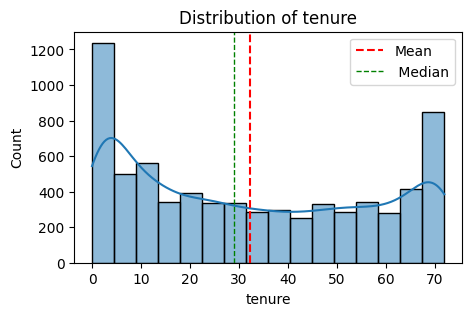

In [40]:
plot_histogram(df, 'tenure')

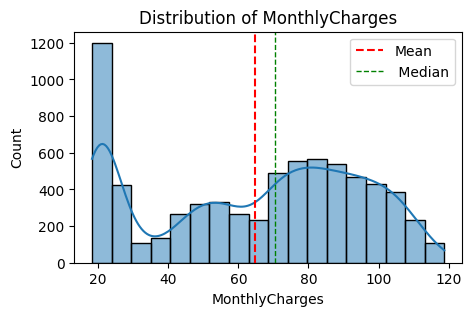

In [41]:
plot_histogram(df, 'MonthlyCharges')

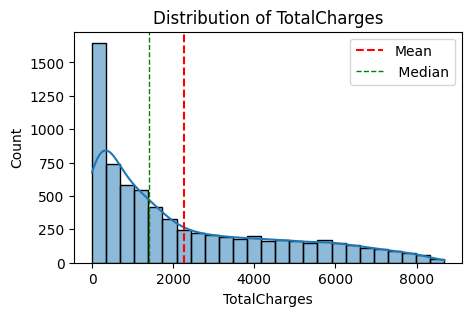

In [42]:
plot_histogram(df, 'TotalCharges')

In [43]:
# box plot for numerical features in order to identify outliers.
# outliers are the data points that fall outside the expected range of variation and are plotted beyond the whiskers.

def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f'Distribution of {column_name}')
  plt.ylabel(column_name)
  plt.show()

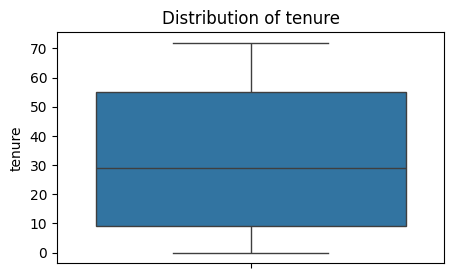

In [44]:
plot_boxplot(df, 'tenure')

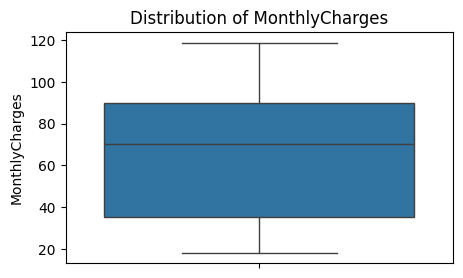

In [45]:
plot_boxplot(df, 'MonthlyCharges')

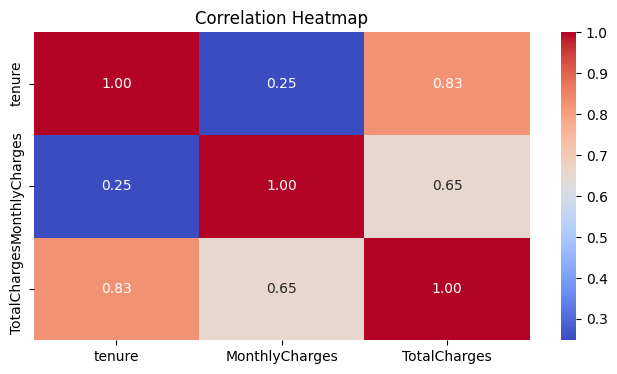

In [46]:
# correlation heat map to understand the relationship/correlation between numerical values
# some scenario, when two columnsare highly correlated, we candrop one column and work with the other column in order to prevent multicolinearity

plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [49]:
# create an array of columns where datatype is object and also include senior citizen to this array
object_cols = df.select_dtypes(include=['object']).columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

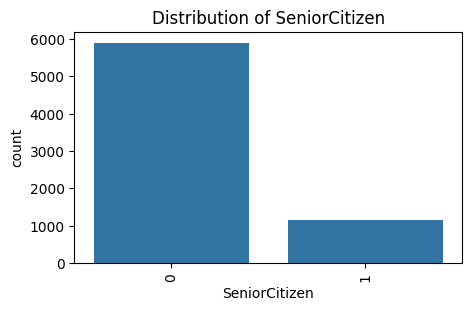

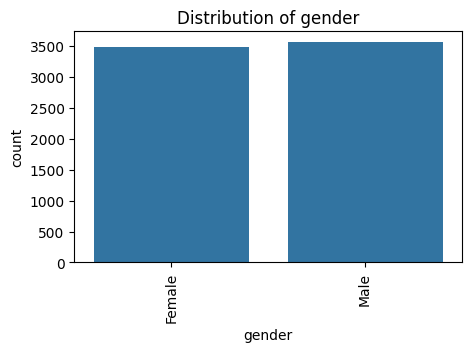

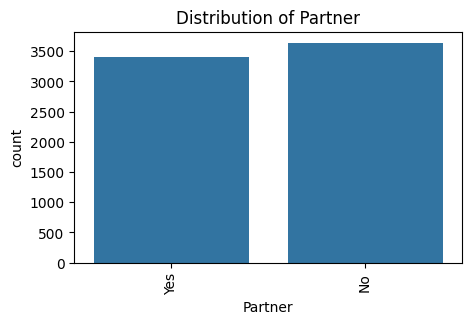

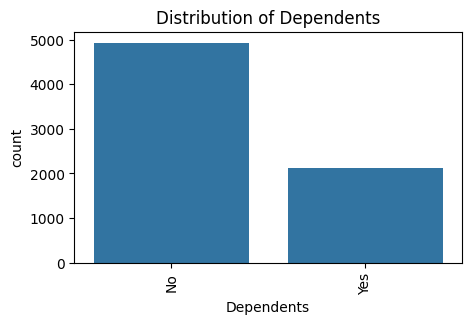

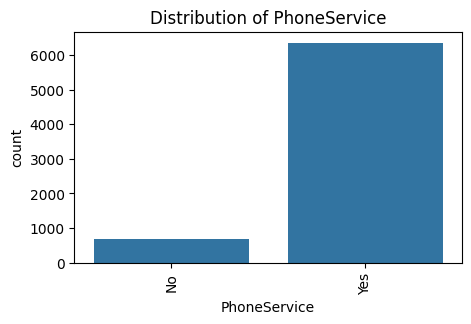

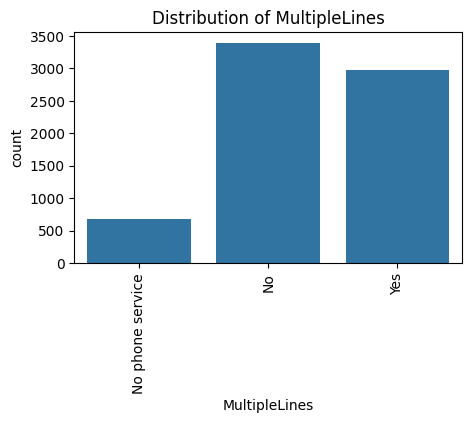

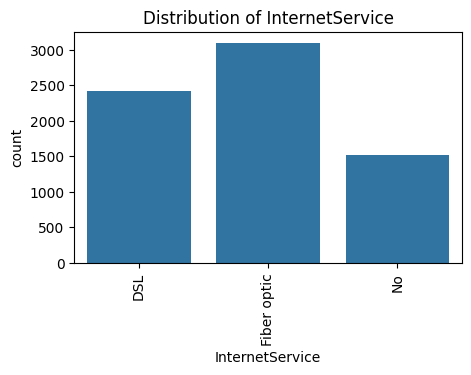

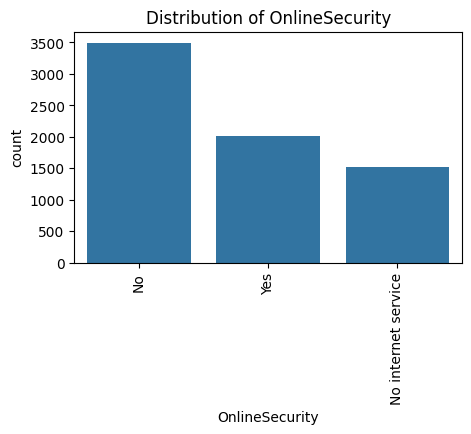

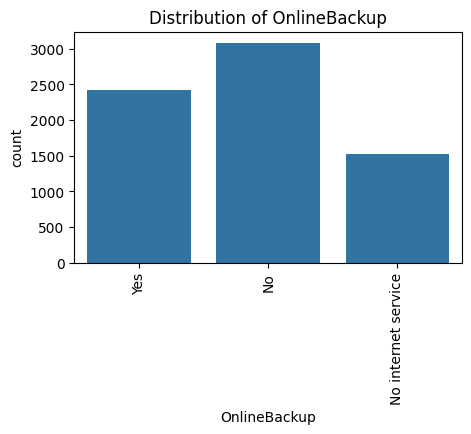

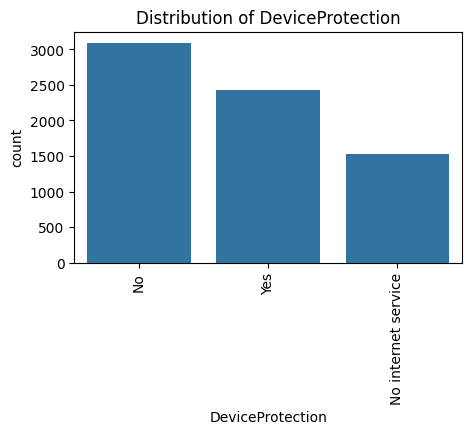

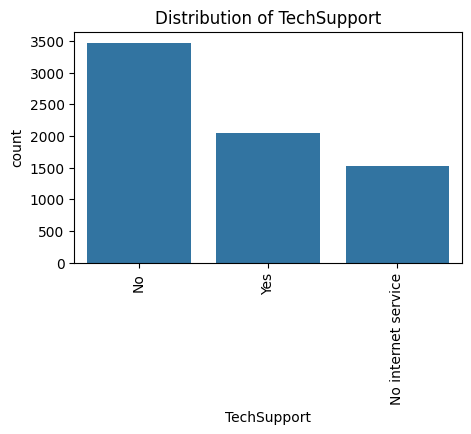

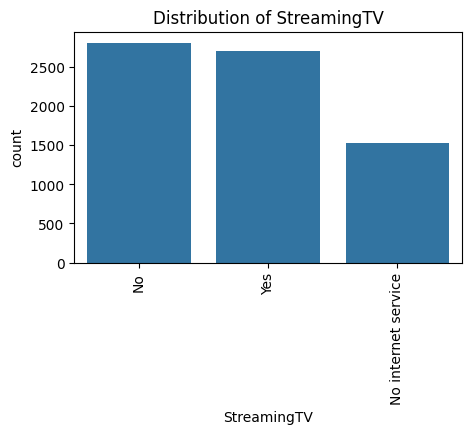

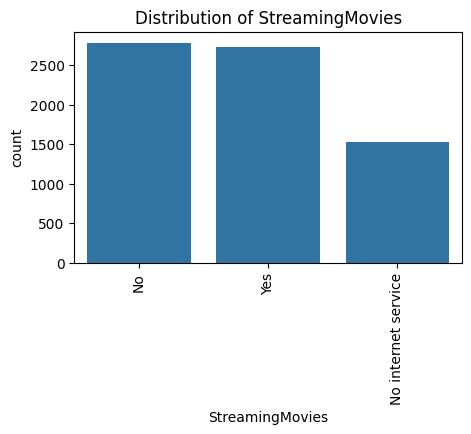

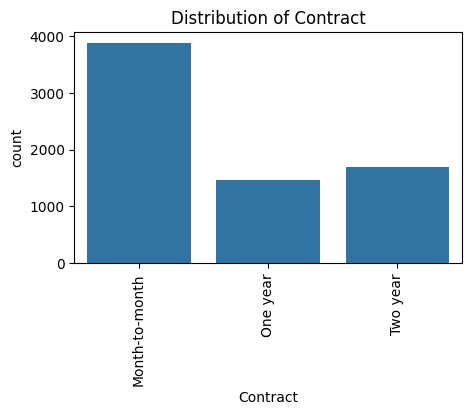

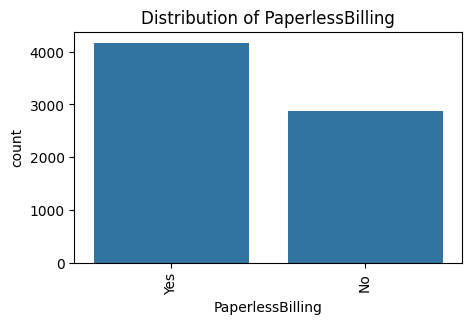

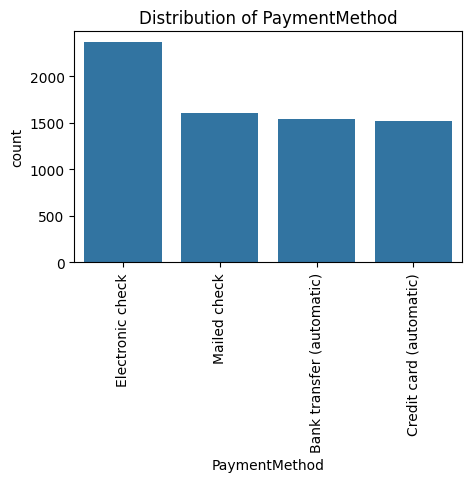

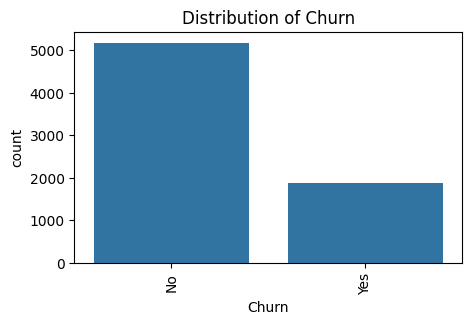

In [50]:
# to view distribution graphically
for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=90)
  plt.show()

In [51]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
# DATA PROCESSING
# encode data by converting string values into binary values like yes/no to 1 or 0

In [52]:
#label enconding of target column

df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-1435770306.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [53]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [54]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [56]:
# identify categorical columns with object datatype

object_columns = df.select_dtypes(include=['object']).columns.to_list()

object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [61]:
# label encoding of all categorical features

encoders = {}

for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

# save the encodersto a pickle file.
with open('encoders.pkl', 'wb') as f:
  pickle.dump(encoders, f)

In [63]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [64]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [65]:
# slpitting independent and dependent variable

X = df.drop(columns=["Churn"])
y = df["Churn"]

In [66]:
print(X)

      gender  SeniorCitizen  ...  MonthlyCharges  TotalCharges
0          0              0  ...           29.85         29.85
1          1              0  ...           56.95       1889.50
2          1              0  ...           53.85        108.15
3          1              0  ...           42.30       1840.75
4          0              0  ...           70.70        151.65
...      ...            ...  ...             ...           ...
7038       1              0  ...           84.80       1990.50
7039       0              0  ...          103.20       7362.90
7040       0              0  ...           29.60        346.45
7041       1              1  ...           74.40        306.60
7042       1              0  ...          105.65       6844.50

[7043 rows x 19 columns]


In [67]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [68]:
#split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
print(y_train.shape)

(5634,)


In [70]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [71]:
# implement synthetic minority oversampling technique (SMOTE) to ensure y_train value countsare equal

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [72]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [74]:
print(y_train_smote.shape)

(8276,)


In [75]:
# Train Model

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [76]:
# dictionary to store cross validation results

cv_scores = {

}

# perform 5 fold cross validation for each model

for model_name, model in models.items():
  print(model_name)
  print(model)
  #scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
  #cv_scores[model_name] = scores

Decision Tree
DecisionTreeClassifier(random_state=42)
Random Forest
RandomForestClassifier(random_state=42)
XGBoost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


In [77]:
# dictionary to store cross validation results

cv_scores = {}

# perform 5 fold cross validation for each model

for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83


In [78]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

In [83]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [84]:
y_test.value_counts()

,count
Churn,
0,1036
1,373


In [86]:
# evaluate model on test data

y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Accuracy Score:
 0.7785663591199432
Confusion Matrix:
 [[878 158]
 [154 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
# data imbalance in target output (churn) affect prediction accuracy as 0 is  1036 count while 1 is 373 count

In [88]:
X.columns.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [90]:
# save trained rfc model as a pickle file

model_data = {"model": rfc, "features_names": X.columns.to_list()}

with open('customer_churn_model.pkl', 'wb') as f:
  pickle.dump(model_data, f)

In [91]:
# Load the saved model and feature_names to build a predictive system

with open('customer_churn_model.pkl', 'rb') as f:
  model_data = pickle.load(f)

loaded_model = model_data['model']
features_names = model_data['features_names']



In [92]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [94]:
print(features_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [114]:
# Define the input data as a dictionary

input_data_ = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_data_df = pd.DataFrame([input_data_])

with open('encoders.pkl', 'rb') as f:
  encoders = pickle.load(f)

print(input_data_df.head())

# encode categorical features using the saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

print(input_data_df.head())

   gender  SeniorCitizen  ... MonthlyCharges TotalCharges
0  Female              0  ...          29.85        29.85

[1 rows x 19 columns]


ValueError: invalid literal for int() with base 10: 'Female'

In [116]:
# Define the input data as a dictionary without the Churn value
input_features_for_prediction = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_data_df_for_prediction = pd.DataFrame([input_features_for_prediction])

with open('encoders.pkl', 'rb') as f:
  encoders = pickle.load(f)

print("Input data before encoding:")
print(input_data_df_for_prediction.head())

# encode categorical features using the saved label encoders

for column, encoder in encoders.items():
  if column in input_data_df_for_prediction.columns and column != 'SeniorCitizen': # Exclude SeniorCitizen from encoding
    # Handle potential unseen values during prediction
    # Add unseen values to the encoder's classes
    for value in input_data_df_for_prediction[column].unique():
        if value not in encoder.classes_:
            encoder.classes_ = np.append(encoder.classes_, value)

    input_data_df_for_prediction[column] = encoder.transform(input_data_df_for_prediction[column])

print("\nInput data after encoding:")
print(input_data_df_for_prediction.head())

# Make the prediction
prediction = loaded_model.predict(input_data_df_for_prediction)
pred_prob = loaded_model.predict_proba(input_data_df_for_prediction)

print(f"\nThe predicted churn for this customer is: {'Yes' if prediction[0] == 1 else 'No'}")
print(f"Prediction Probability: {pred_prob}")

Input data before encoding:
   gender  SeniorCitizen  ... MonthlyCharges TotalCharges
0  Female              0  ...          29.85        29.85

[1 rows x 19 columns]

Input data after encoding:
   gender  SeniorCitizen  Partner  ...  PaymentMethod  MonthlyCharges  TotalCharges
0       2              0        2  ...              4           29.85         29.85

[1 rows x 19 columns]

The predicted churn for this customer is: No
Prediction Probability: [[0.9 0.1]]
